## 개념
하나의 속성값을 기준으로 다른 속성이 독립적이라 전제했을 때 해당 속성값이 클래스에 미치는 영향

### 장점
* 간단하고 빠름
* 노이즈 결측치에 강하다.(희소한 고차원 데이터에 잘 작동)
* 예측을 위한 추정확률을 쉽게 얻을 수 있다.
* 모든 데이터 특징이 독립적인 사건으라는 가정에도 불구하고, 실제 높은 정확도 보임
* 비교적 매개변수에 민감하지 않다. 

### 단점
* 일반화 성능이 조금 떨어질 수 있다.
* 독립이라 가정했기 때문에 가정이 잘못된 경우들이 종종 있다

### 선택기준
* 데이터가 많지 않은 경우:빈도주의적 추론의 사용이 마땅치 않은 경우 추천
* 추정의 목적이 미래 예측일때:하나의 추정치를 고집하는 것이 아니라, 계속해서 값을 수정하면서 현실적인 추정치를 찾아나가는 기법

### 조건부 확률
$P(A|B) = P( A\cap B) / P(B)  =>  P( A\cap B)  = P(A|B) * P(B)$\
$P(B|A) = P( A\cap B) / P(A)  =>  P( A\cap B)  = P(B|A) * P(A)$ \
$P(A|B) * P(B) = P(B|A) * P(A)$ \
따라서  $$P(A|B) = \frac{P(A) * P(B|A)} {P(B)} $$
$$ P(레이블|데이터특징) = \frac{P(레이블)  * P(데이터특징|레이블)} {P(데이터특징)} $$

* $P(A|B)$: 사후확률
* $P(B|A)$: 우도
* $P(A\cap B)$ : 사건 A와 B가 동시에 발생할 확률
* $P(A)$: 사전 확률, 사건 A가 발생할 확률
* $P(B)$: 관찰값, 사건 B가 발생할 확률


### 전확률 정리
표본 공간 분할인 $A_1,A_2,...,A_n$은 서로 배반사건(교집합이 공집합)이며, $P(A_i)>0$이면 다음이 성립 \
$P(B)= P(A_1)P(B|A_1) + P(A_2)P(B|A_2) + ...+ P(A_n)P(B|A_n) $
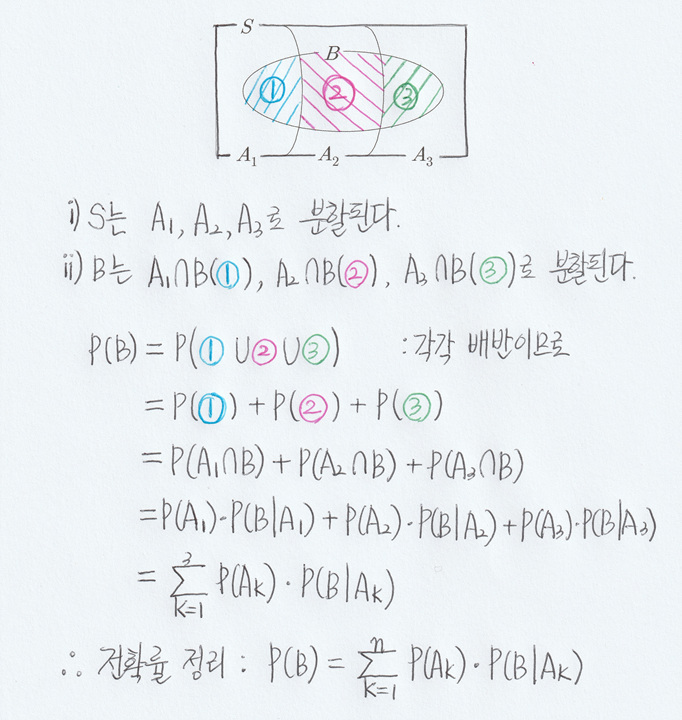

### 베이즈 정리 
* 새로운 정보를 토대로 어떤 사건이 발생했다는 주장에 대한 신뢰도들 갱신해 나가는 방법

$$P(A_k|B) = \frac{P(A_k) P(B|A_k)} {\sum_{i=1}^n P(A_i)P(B|A_i)}$$

* https://angeloyeo.github.io/2020/08/04/naive_bayes.html 
* https://www.youtube.com/watch?v=KueAHu7iFNE&t=612s

### 결합확률
* 사건 A와 B가 동시에 발생할 확률이다.
즉, 사건A도 진실이고 사건 B도 진실이므로, 사건 A와 B의 교집합의 확률로 계산.\
$P( A\cap B)$ 
* 수학적으로는 사건 A와 사건 B의 결합확률의 값이 다음과 같은 관계가 성립하면 두 사건 A와 B는 서로 독립\
$P( A\cap B) =  P(B) * P(B)$


### 베이즈 정리 확장
* https://angeloyeo.github.io/2020/08/04/naive_bayes.html 
* https://www.youtube.com/watch?v=KueAHu7iFNE&t=612s
* 가령 클래스가 $c_1,c_2$ 가지만 있다고 했을 때 n개의 feature가 주어지는 경우, 식은 다음과 같다 \
  $P(c_1|x_1,x_2,...,x_n) >?  P(c_2|x_1,x_2,...,x_n $
  
  $P(c_1|x_1,x_2,...,x_n) =  P(c_1)P(x_1|c_1),P(x_2|c_1,x_1),P(x_3|c_1,x_1,x_2),...,P(x_n|c_1,x_1,x_2,...,x_{n-1})$
* feature들은 모두 독립적으로 추출된다고 가정하자.\
  $P(c_1|x_1,x_2,...,x_n) =  P(c_1)P(x_1|c_1),P(x_2|c_1),P(x_3|c_1),...,P(x_n|c_1)$ \
  $P(c_2|x_1,x_2,...,x_n) =  P(c_2)P(x_1|c_2),P(x_2|c_2),P(x_3|c_2),...,P(x_n|c_2)$

### 라플라스 스무딩
나이브베이즈의 분류를 보정하는 방법. 학습데이터에 없는 데이터가 실제데이터에 나타나게 되면 확률이 0이되어 분류가 어려워진다. 
스무딩은 이런 문제를 극복하고저 학습데이터에 없는 데이터가 등장해도 빈도수에 0을 더해서 확률이 0이되는 현상을 막는다.

## 가우시안 나이브베이즈
* 나이브베이지는 이산적인 데이터에 잘 반응하지만, 연속형인 데이터를 사용하기 위해서는 가우시안 NB 사용을 추천
* 특징들이 정규 분포라는 가정하에 조건부 확률로 계산 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sky= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Skyserver.csv")
sky.info()
sky.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [13]:
print(sky['class'].value_counts())
sky['class'].nunique()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64


3

In [14]:
# sns.pairplot(sky[['z','run','i','class']],hue='class')
# sns.pairplot(sky,hue='class')

In [15]:
import scipy.stats as stats
# help(stats.shapiro)
# stats.shapiro(sky['z']) 
              # ,'run','i','class']])
sky[sky['class']  == 'STAR']['z']
stats.shapiro(sky[sky['class']  == 'STAR']['z']) 
star_z = sky[sky['class']  == 'STAR']['z']

In [16]:
cols = sky.columns.difference(['class','mjd'])
print(cols)
# fig, axs =  plt.subplots(figsize=(8,100),ncols =1,nrows =  17)

# for i,col in enumerate(cols) :
#     # sns.histplot(x=col, data=sky, kde = True,hue= 'class',ax = axs[i])    
#     plt.figure(figsize = (10,3))
#     sns.histplot(x=col, data=sky, kde = True,hue= 'class')    

Index(['camcol', 'dec', 'fiberid', 'field', 'g', 'i', 'objid', 'plate', 'r',
       'ra', 'redshift', 'rerun', 'run', 'specobjid', 'u', 'z'],
      dtype='object')


In [17]:
# plt.figure(figsize = (3,3))
# sns.histplot(star_z, data=sky, kde = True,hue= 'class')

In [18]:
# fig, axs =  plt.subplots(figsize=(20,40),ncols =3,nrows =  17)
# sns.histplot(star_z, bins =60, kde = True,  ax = axs[0][0])

In [19]:
from sklearn.model_selection import train_test_split
temp = sky.copy()
y = temp.pop('class')
x = temp
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.7,random_state = 1,stratify= y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((7000, 17), (3000, 17), (7000,), (3000,))

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred =  gnb.fit(train_x,train_y).predict(test_x)
gnb.score(test_x,test_y)

0.799

In [21]:
pred[[0,13,68]]

array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [22]:
from sklearn.metrics import classification_report 
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



In [23]:
# from collections import Counter
# print(Counter(pred))
# # print(Counter(test_y))
# print(pd.DataFrame(pred).value_counts())
# print(pd.DataFrame(test_y).value_counts())

In [24]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
pred =  gnb.fit(train_x,train_y).predict(test_x)
gnb.score(test_x,test_y)
print(gnb.score(test_x,test_y))
print(classification_report(test_y,pred))

0.6856666666666666
              precision    recall  f1-score   support

      GALAXY       0.61      0.99      0.76      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.98      0.46      0.62      1246

    accuracy                           0.69      3000
   macro avg       0.53      0.48      0.46      3000
weighted avg       0.72      0.69      0.64      3000



In [25]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
train_x.pop('redshift')
train_x.pop('dec')
test_x.pop('redshift')
test_x.pop('dec')
pred =  gnb.fit(train_x,train_y).predict(test_x)
print(gnb.score(test_x,test_y))
print(classification_report(test_y,pred))

0.7973333333333333
              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.07      0.00      0.01       255
        STAR       0.91      0.75      0.82      1246

    accuracy                           0.80      3000
   macro avg       0.58      0.58      0.56      3000
weighted avg       0.76      0.80      0.76      3000



## 베르누이 나이브베이즈
* 데이터의 특징이 0 또는 1로 표현됐을때 사용
* 주사위를 10번 던진 결과 1이 한번, 2가 두번, 3이세번, 4가 네번 나왔을때, (1,1,1,1,0,0)와 같이 출현여부에따라 0,1로 구분될때 사용
* 스팸메일 분류시 사용

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

spam= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/spam.csv")
spam.info()
spam.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [28]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [29]:
spam= spam[['v1','v2']]
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ? b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [30]:
spam['v1'].unique()
spam['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [31]:
spam['label'] = spam['v1'].map({'spam':1,'ham':0})
spam['label1'] = np.where(spam['v1']== 'spam',1,0)
spam

,v1,v2,label,label1
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,1
5568,ham,Will ? b going to esplanade fr home?,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0


In [32]:
temp = spam.copy()
y= temp.pop('label')
x= temp.pop('v2')
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
tr_x,ts_x,tr_y,ts_y = train_test_split(x,y,stratify = y,test_size = 0.3, random_state = 1)
tr_x.shape,ts_x.shape,tr_y.shape,ts_y.shape

((3900,), (1672,), (3900,), (1672,))

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(binary =True)
tr_x_cv = cv.fit_transform(tr_x)
ts_x_cv = cv.transform(ts_x)
# tr_x_cv.info() # 안됨
# tr_x_cv.describe() # 안됨
# tr_x_cv.dtypes # 안됨
tr_x_cv.shape,ts_x_cv.shape

((3900, 7175), (1672, 7175))

In [35]:
tr_en = tr_x_cv.toarray()
ts_en = ts_x_cv.toarray()
tr_en

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
cv.inverse_transform(tr_en[[1]])

[array(['accumulation', 'an', 'are', 'around', 'gonna', 'if', 'inch', 'it',
        'its', 'of', 'or', 'pm', 'predicting', 'said', 'snow', 'start',
        'they', 'tonite', 'will'], dtype='<U34')]

In [56]:
cv.inverse_transform(tr_x_cv[[0]])

[array(['yeah', 'sure', 'give', 'me', 'couple', 'minutes', 'to', 'track',
        'down', 'my', 'wallet'], dtype='<U34')]

In [57]:
cv.get_feature_names_out()[500:800]
# print(cv.get_feature_names_out()[1000:1010])

array(['62220cncl', '6230', '62468', '630', '63miles', '645', '65', '650',
       '66', '674', '67441233', '68866', '69669', '69696', '69698',
       '69855', '69866', '69888', '69969', '69988', '6days', '6hl',
       '6hrs', '6ish', '6missed', '6months', '6ph', '6pm', '6th',
       '6times', '6wu', '700', '7250', '7250i', '730', '74355', '750',
       '7548', '75max', '7634', '7684', '77', '7732584351', '786', '7am',
       '7cfca1a', '7ish', '7mp', '7oz', '7pm', '7th', '80', '800',
       '80062', '8007', '80082', '80086', '80155', '80160', '80182',
       '8027', '80488', '80608', '8077', '80878', '81010', '81151',
       '81303', '81618', '82050', '820554ad0a1705572711', '82242',
       '82277', '82468', '83021', '83049', '83110', '83118', '83222',
       '83332', '83338', '83355', '83370', '83383', '83435', '83600',
       '83738', '84', '84025', '84128', '84199', '84484', '850', '85023',
       '85069', '85222', '85233', '8552', '85555', '86021', '864233',
       '86688', '86888'

In [58]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
pred =  gnb.fit(tr_x_cv,tr_y).predict(ts_x_cv)
print(gnb.score(ts_x_cv,ts_y))
print(classification_report(ts_y,pred))

0.9754784688995215
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



In [59]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
pred =  gnb.fit(tr_x_cv,tr_y).predict(ts_x_cv)
print(gnb.score(ts_x_cv,ts_y))
print(classification_report(ts_y,pred))

0.9880382775119617
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.99      0.92      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# pred =  gnb.fit(tr_x_cv,tr_y).predict(ts_x_cv)
pred =  gnb.fit(tr_en,tr_y).predict(ts_en)
print(gnb.score(ts_en,ts_y))
print(classification_report(ts_y,pred))

0.9090909090909091
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1448
           1       0.61      0.92      0.73       224

    accuracy                           0.91      1672
   macro avg       0.80      0.91      0.84      1672
weighted avg       0.94      0.91      0.92      1672



## 다항분포 나이브베이즈
* 데이터의 출현횟수에다라 값을 달리한 데이터에 사용
* 주사위를 10번 던진 결과 1이 한번, 2가 두번, 3이세번, 4가 네번 나왔을때, (1,2,3,4,0,0)와 같이 등장 횟수로 나타낼때 사용
* 영화 감상평을 토대로 리뷰 분류

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import keras
warnings.filterwarnings('ignore')
from keras.datasets import imdb
(X_train,y_train),(X_test,y_test) = imdb.load_data()
# --pip install keras
# spam= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/spam.csv")
# spam.info()
# spam.describe()


In [63]:
print(X_train.shape, X_test.shape)
X_train

(25000,) (25000,)


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [64]:
import pandas as pd
word_to_index = imdb.get_word_index() 
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key 
for index, token in enumerate(('<pad>', '<sos>', '<unk>')):
    index_to_word[index] = token
train_reviews = [] 
for X in X_train:
    tmp =' '.join([index_to_word[index] for index in X]) 
    train_reviews.append(tmp)
    
test_reviews = []
for X in X_test:
    tmp =' '.join([index_to_word[index] for index in X]) 
    test_reviews.append(tmp)
train = pd.concat([pd.DataFrame(train_reviews), pd.DataFrame(y_train)], axis =1) 
train.columns = ['reviews', 'label'] 
train['reviews'] = train['reviews'].str[6:]

test = pd.concat([pd.DataFrame(test_reviews), pd.DataFrame(y_test)], axis =1) 

test.columns = ['reviews', 'label'] 
train['reviews'] = train['reviews'].str[6:]
print('<<<<<<<<< Train Dataset for MNB >>>>>>>>>', train) 
print('<<<<<<<<< Test Dataset for MNB >>>>>>>>>', test)


<<<<<<<<< Train Dataset for MNB >>>>>>>>>                                                  reviews  label
0      ilm was just brilliant casting location scener...      1
1      ir big boobs bad music and a giant safety pin ...      0
2      as to be one of the worst films of the 1990s w...      0
3      ots excel at storytelling the traditional sort...      1
4      mistake of my life br br i picked this movie u...      0
...                                                  ...    ...
24995  s a racist movie but worthy of study and enjoy...      1
24996  ugosi plays a doctor who will do anything to k...      0
24997  ar away galaxy is a planet called ceta it's na...      0
24998  grees had me hooked i looked forward to it com...      1
24999  ig fan of the original film it's hard to watch...      0

[25000 rows x 2 columns]
<<<<<<<<< Test Dataset for MNB >>>>>>>>>                                                  reviews  label
0      <sos> please give this one a miss br br kristy...   

In [65]:
x_train = train.reviews
x_test = test.reviews
y_train = train.label
y_test = test.label
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(binary =False)
tr_x_cv = cv.fit_transform(x_train)
ts_x_cv = cv.transform(x_test)
# tr_x_cv.info() # 안됨
# tr_x_cv.describe() # 안됨
# tr_x_cv.dtypes # 안됨
tr_x_cv.shape,ts_x_cv.shape

((25000, 76521), (25000, 76521))

In [67]:
tr_en = tr_x_cv.toarray()
ts_en = ts_x_cv.toarray()
tr_en

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
cv.inverse_transform(tr_x_cv[[0]])

[array(['ilm', 'was', 'just', 'brilliant', 'casting', 'location',
        'scenery', 'story', 'direction', 'everyone', 'really', 'suited',
        'the', 'part', 'they', 'played', 'and', 'you', 'could', 'imagine',
        'being', 'there', 'robert', 'redford', 'is', 'an', 'amazing',
        'actor', 'now', 'same', 'director', 'norman', 'father', 'came',
        'from', 'scottish', 'island', 'as', 'myself', 'so', 'loved',
        'fact', 'real', 'connection', 'with', 'this', 'film', 'witty',
        'remarks', 'throughout', 'were', 'great', 'it', 'much', 'that',
        'bought', 'soon', 'released', 'for', 'retail', 'would',
        'recommend', 'to', 'watch', 'fly', 'fishing', 'cried', 'at', 'end',
        'sad', 'know', 'what', 'say', 'if', 'cry', 'must', 'have', 'been',
        'good', 'definitely', 'also', 'congratulations', 'two', 'little',
        'boy', 'of', 'paul', 'children', 'are', 'often', 'left', 'out',
        'praising', 'list', 'think', 'because', 'stars', 'play', 'them'

In [69]:
cv.get_feature_names_out()[1500:1800]

array(['acolyte', 'acolytes', 'acomplication', 'acorn', 'acorns',
       'acosta', 'acoustic', 'acoustics', 'acp', 'acquaint',
       'acquaintaces', 'acquaintance', 'acquaintances', 'acquainted',
       'acquaints', 'acquart', 'acques', 'acquiesce', 'acquiescence',
       'acquire', 'acquired', 'acquires', 'acquiring', 'acquisition',
       'acquit', 'acquitane', 'acquits', 'acquittal', 'acquitted', 'acre',
       'acres', 'acrid', 'acrimonious', 'acrimony', 'acrobat',
       'acrobatic', 'acrobatics', 'acronym', 'acropolis', 'across', 'acs',
       'act', 'actally', 'acted', 'actelone', 'actess', 'acteurs',
       'actin', 'acting', 'actingjob', 'actings', 'actingwise', 'actio',
       'action', 'actiona', 'actioned', 'actioneer', 'actioneers',
       'actioner', 'actioners', 'actionless', 'actionmovie',
       'actionpacked', 'actions', 'actionscenes', 'activate', 'activated',
       'activates', 'activating', 'active', 'actively', 'actives',
       'activest', 'activision', 'activi

In [74]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
pred =  gnb.fit(tr_x_cv,y_train).predict(ts_x_cv)
print(gnb.score(ts_x_cv,y_test))
print(classification_report(y_test,pred))

0.83192
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     12500
           1       0.86      0.79      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [76]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
pred =  gnb.fit(tr_x_cv,y_train).predict(ts_x_cv)
print(gnb.score(ts_x_cv,y_test))
print(classification_report(y_test,pred))

0.81932
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12500
           1       0.85      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# pred =  gnb.fit(tr_x_cv,tr_y).predict(ts_x_cv)
pred =  gnb.fit(tr_en,y_train).predict(ts_en)
print(gnb.score(ts_en,y_test))
print(classification_report(y_test,pred))